# Basic Tutorial

<h3>Welcome to Modelgym Basic Tutorial.</h3>

As an example, we will show you how to use Modelgym for <strong>binary classification</strong> problem.

<ol>
  <p>In this tutorial we will go through the following steps:</p>
  <li>Choosing the models.</li>
  <li>Searching for the best hyperparameters on default spaces using TPE algorithm locally.</li>
  <li>Visualizing the results.</li>
</ol>


## Define models we want to use

In this tutorial, we will use

1. LightGBMClassifier
2. XGBoostClassifier
3. RandomForestClassifier
4. CatBoostClassifier

In [1]:
from modelgym.models import LGBMClassifier, XGBClassifier, RFClassifier, CtBClassifier

/Users/f-minkin/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
models = [LGBMClassifier, XGBClassifier, RFClassifier, CtBClassifier]

## Get dataset

For tutorial purposes we will use toy dataset

In [3]:
from sklearn.datasets import make_classification
from modelgym.utils import XYCDataset

In [4]:
X, y = make_classification(n_samples=500, n_features=20, n_informative=10, n_classes=2)
dataset = XYCDataset(X, y)

## Create a TPE trainer

In [5]:
from modelgym.trainers import TpeTrainer
trainer = TpeTrainer(models)

## Optimize hyperparams

We chose accuracy as a main metric that we rely on when optimizing hyperparams.

Also keep track for RocAuc and F1 measure besides accuracy for our best models.

Please, keep in mind, that now we're optimizing hyperparameters from the default space of hyperparameters.<br>
That means, they are not optimal, for optimal ones and complete understanding follow advanced tutorial.

In [6]:
from modelgym.metrics import Accuracy, RocAuc, F1

Of course, it will take some time.

In [7]:
%%time
trainer.crossval_optimize_params(Accuracy(), dataset, metrics=[Accuracy(), RocAuc(), F1()])

/Users/f-minkin/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 2h 2min 45s, sys: 47min 59s, total: 2h 50min 45s
Wall time: 28min 17s


## Report best results

In [8]:
from modelgym.report import Report

In [12]:
reporter = Report(trainer.get_best_results(), dataset, [Accuracy(), RocAuc(), F1()])

### Report in text form

In [13]:
reporter.print_all_metric_results()


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                            tuned
LGBMClassifier   0.776002 (0.00%)
XGBClassifier    0.838059 (8.00%)
RFClassifier     0.800075 (3.10%)
CtBClassifier   0.861963 (11.08%)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                            tuned
LGBMClassifier   0.815768 (0.00%)
XGBClassifier   0.904991 (10.94%)
RFClassifier     0.875230 (7.29%)
CtBClassifier   0.926832 (13.61%)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    f1_score    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                            tuned
LGBMClassifier   0.777157 (0.00%)
XGBClassifier    0.835813 (7.55%)
RFClassifier     0.792136 (1.93%)
CtBClassifier   0.859078 (10.54%)


### Report plots


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



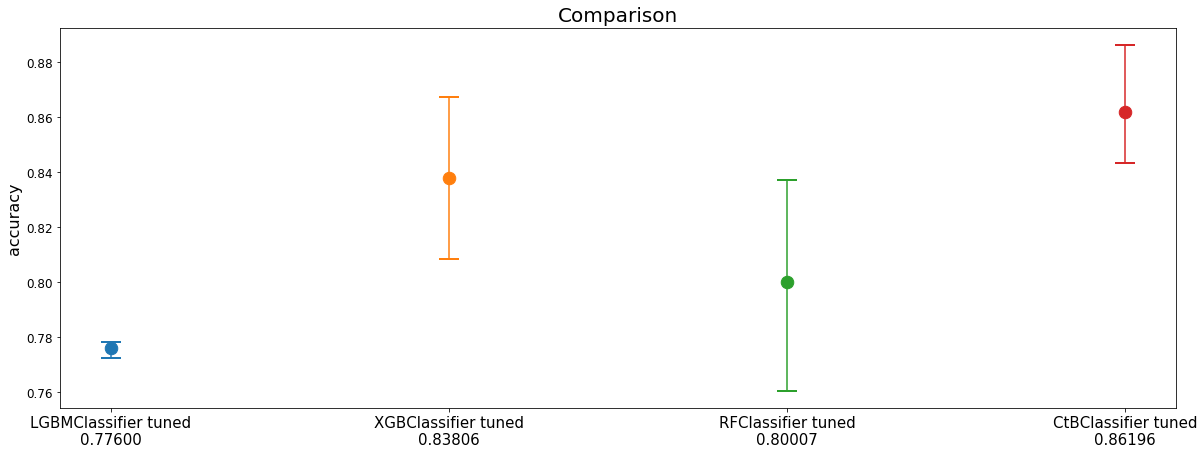


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



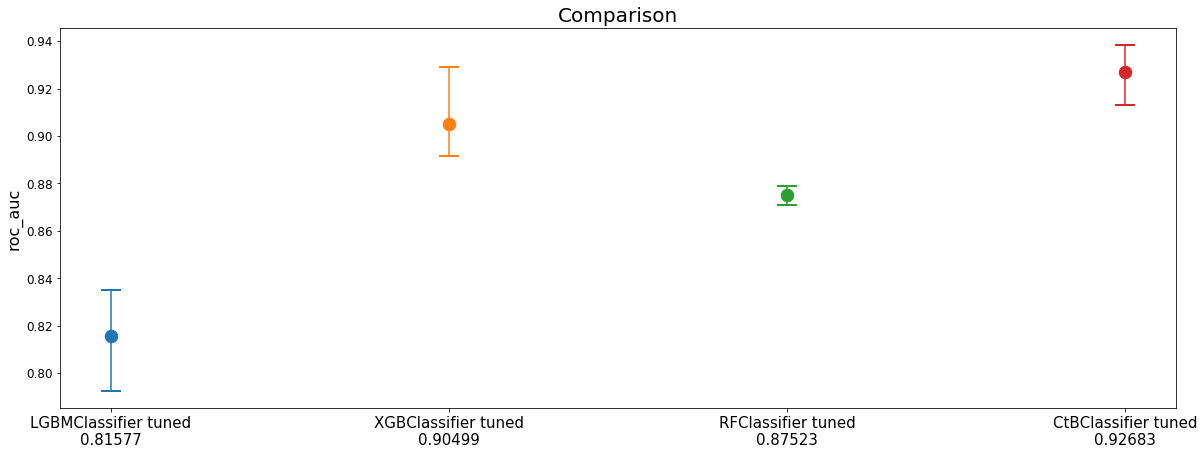


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    f1_score    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



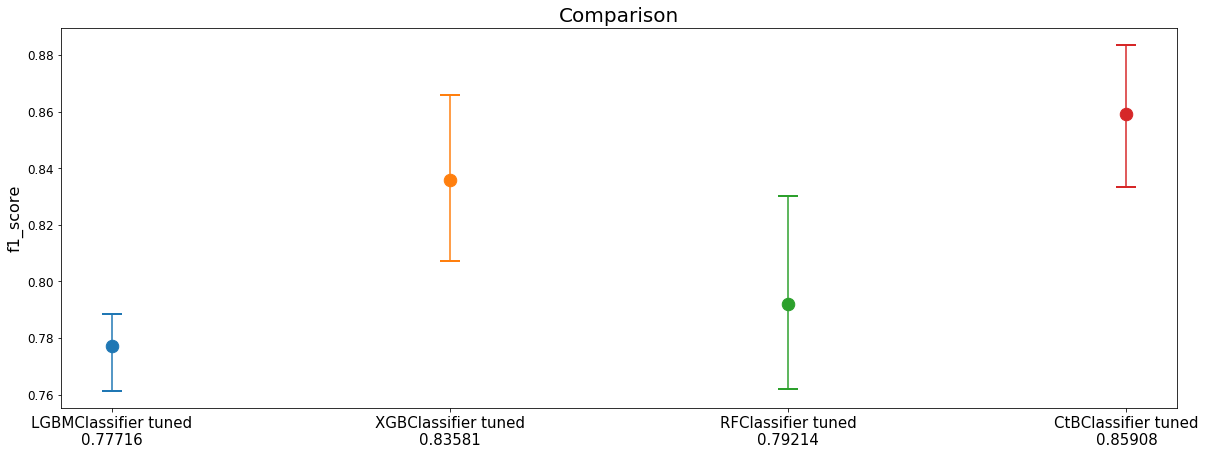

In [15]:
reporter.plot_all_metrics()

### Report heatmaps for each metric


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



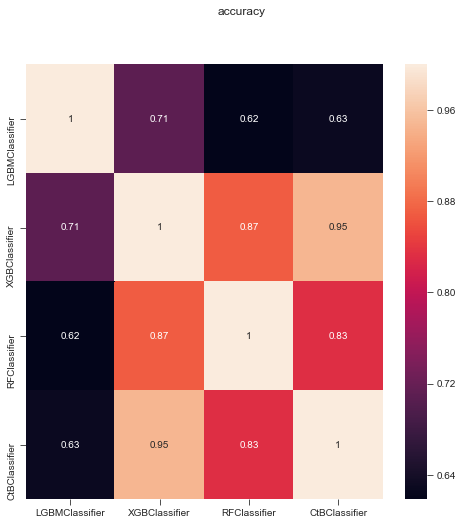


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



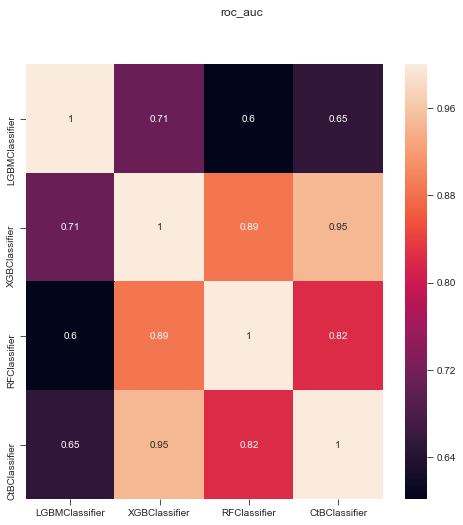


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    f1_score    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



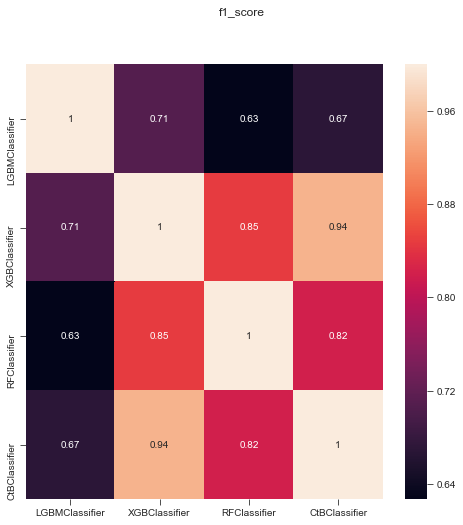

In [16]:
reporter.plot_heatmaps()

That's it! 

If you like it, please follow the advanced tutorial and learn all features modelgym can provide.